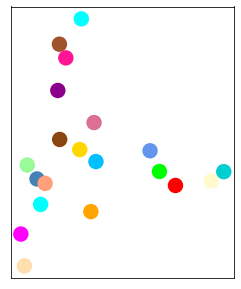

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

###load features of examples
ab_pkl_dir = './example_abnormal.pkl'
nor_pkl_dir = './example_normal.pkl'

ab_file = open(ab_pkl_dir,'rb')
ab_data = pickle.load(ab_file)
nor_file = open(nor_pkl_dir,'rb')
nor_data = pickle.load(nor_file)

key = 'im_minmax_fea'
###total_fea
fea = np.vstack((ab_data[key],nor_data[key]))

pca = PCA(n_components=2, whiten = True)
pca.fit(fea)
pca_fea = pca.transform(fea)

### coloar c_list1[0] and c_list2[0] is abnormal and normal regions in two imgages below
c_list1 = ['red','Orange','DarkTurquoise','SteelBlue','Aqua','LightSalmon',
              'Fuchsia','SaddleBrown','NavajoWhite','PaleGreen']
c_list2 = ['lime','CornflowerBlue','PaleVioletRed','DeepSkyBlue','LemonChiffon','Gold',
              'Cyan','Sienna','DarkMagenta','DeepPink']
color3 = c_list1+c_list2


plt.figure(figsize=(4,5))
plt.yticks([])
plt.xticks([])
plt.scatter(pca_fea[:, 0], pca_fea[:, 1], c=color3, s = 180, marker = 'o', linewidths=2)
# plt.savefig("pca_orginalfeature.png", dpi = 300)
plt.show()


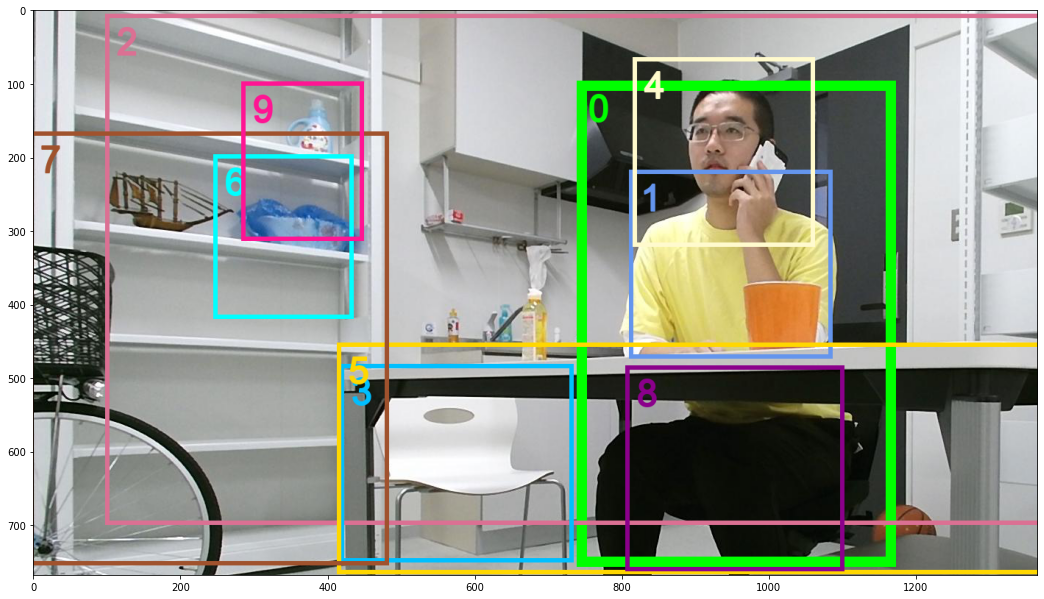

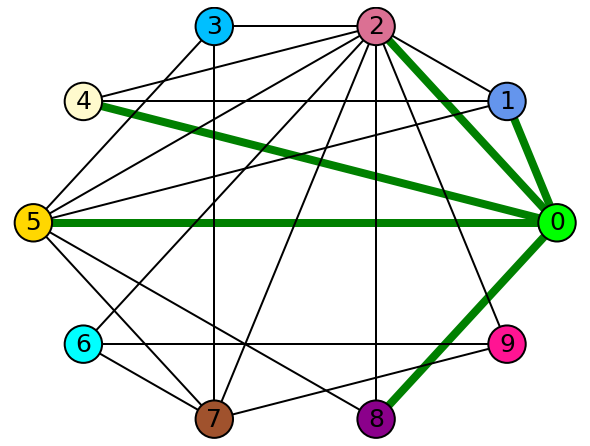

Node and label:
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}
Node and cap:                                       0
0          man holding a wii controller
1               a yellow shirt on a man
2                    a man in a kitchen
3               white chair in the room
4                      man with a beard
5                    white wooden table
6                  blue and white shelf
7                   white metal railing
8  the person is wearing a black jacket
9                  blue and white shelf
Adj_matrix:
[[0 1 1 0 1 1 0 0 1 0]
 [1 0 1 0 1 1 0 0 0 0]
 [1 1 0 1 1 1 1 1 1 1]
 [0 0 1 0 0 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 1 0 1]
 [0 0 1 1 0 1 1 0 0 1]
 [1 0 1 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 1 0 0]]


In [4]:
'''
Visualize regions and captions and construct graphs
'''


import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import json

'''
Region Visualization
'''
vis_img_dir = './'
img_name = 'example_normal.jpg'
json_name = img_name.replace('jpg','json')

### Image visualization
plt.figure(figsize=(18,18))

jsonfile = json.load(open(vis_img_dir + json_name))
results = jsonfile['results'][0]
num_sample = 10
boxes = results['boxes'][:num_sample]
captions = results['captions'][:num_sample]
number = list(range(10))

image =Image.open(vis_img_dir + img_name)
image4crop =Image.open(vis_img_dir + img_name)
draw =ImageDraw.Draw(image)

###use same color list in feature visualization
color_list = c_list2

font = ImageFont.truetype('./arialuni.ttf', size=50)

for color, box, cap, num in zip(color_list, boxes, captions, number):
    x0,y0,x1,y1 = box[0], box[1], box[0]+box[2], box[1]+box[3]
    ##different width of bouding boxes
    if num == 0:
        draw.rectangle([(x0,y0),(x1,y1)], outline =color, width=14)
    else:
        draw.rectangle([(x0,y0),(x1,y1)], outline =color, width=6)
    ##draw number
    draw.text([x0+15,y0+1], str(num),fill = color, font=font, anchor='ms', stroke_width=1)
    

# image.save('./example_1.png')    
plt.imshow(image)

'''
Graph Visualization
'''
import numpy as np
import pickle

vis_graph_dir = './'
graph_name = img_name.replace('jpg','pkl')

plt.figure(figsize=(8,6))

with open(vis_graph_dir+graph_name,'rb') as file:
    vis_data = pickle.load(file)

vis_adj = vis_data['adj_list']
vis_adj_mx = vis_data['adj_mx']
vis_cap = np.array(results['captions'][:10]).reshape(-1,1)
vis_label = vis_data['label']

#get edge_list
edge_list = []
for node_idx in vis_adj:
    #consider nodes without neighbor 
    if vis_adj[node_idx]==set():
        pass
    else:
        edge = []
        for neighbor in list(vis_adj[node_idx]):
            node_pair = [node_idx]
            node_pair.append(neighbor)
            edge.append(node_pair)
        for edge_pair in edge:
            edge_list.append(edge_pair)

graph = nx.Graph()

total_node = list(range(vis_cap.shape[0]))

for node_id in total_node:
    graph.add_node(node_id)

###emphasize Node 0 with green edges color for example
graph.add_edges_from(edge_list, color = 'black',weight =2)
graph.add_edges_from(edge_list[:6], color='g',weight=8)

edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
weights = [graph[u][v]['weight'] for u,v in edges]

nx.draw_shell(graph,with_labels = True, node_color = color_list, font_size = 25,
              edge_color=colors, 
              node_size =1400, 
              edgecolors = 'black', linewidths = 2,
              width = weights,)

#plt.savefig("graph_nor.pdf")
plt.show()

print('Node and label:',dict(zip(total_node,vis_label)),sep = '\n')

print('Node and cap:', pd.DataFrame.from_dict(dict(zip(total_node,vis_cap))).T)
print('Adj_matrix:')
print(vis_adj_mx.todense())

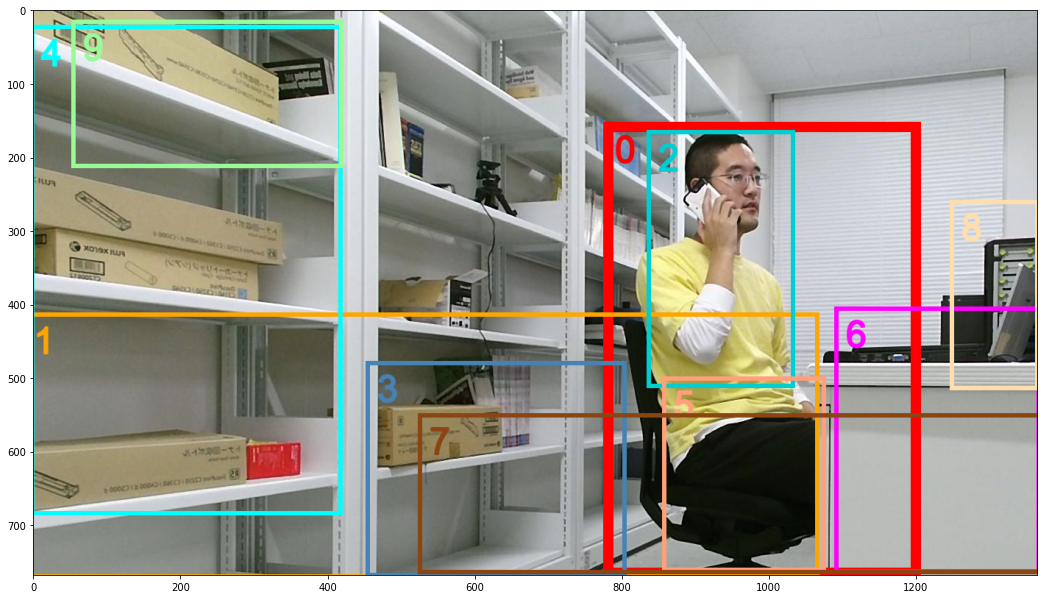

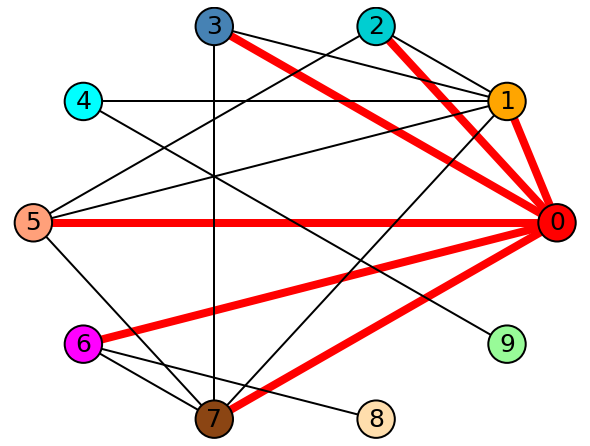

Node and label:
{0: 1.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}
Node and cap:                                     0
0               man in a yellow shirt
1                 a white wooden cart
2          man wearing a yellow shirt
3  a white cabinet with a wooden door
4                a white refrigerator
5            a yellow and black pants
6              white kitchen cabinets
7           the floor is made of wood
8               a laptop on the table
9                  a sign on the wall
Adj_matrix:
[[0 1 1 1 0 1 1 1 0 0]
 [1 0 1 1 1 1 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 1 0]
 [1 1 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


In [5]:
'''
Visualize regions and captions and construct graphs
'''


import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import json

'''
Region Visualization
'''
vis_img_dir = './'
img_name = 'example_abnormal.jpg'
json_name = img_name.replace('jpg','json')

### Image visualization
plt.figure(figsize=(18,18))

jsonfile = json.load(open(vis_img_dir + json_name))
results = jsonfile['results'][0]
num_sample = 10
boxes = results['boxes'][:num_sample]
captions = results['captions'][:num_sample]
number = list(range(10))

image =Image.open(vis_img_dir + img_name)
image4crop =Image.open(vis_img_dir + img_name)
draw =ImageDraw.Draw(image)

###use same color list in feature visualization
color_list = c_list1

font = ImageFont.truetype('./arialuni.ttf', size=50)

for color, box, cap, num in zip(color_list, boxes, captions, number):
    x0,y0,x1,y1 = box[0], box[1], box[0]+box[2], box[1]+box[3]
    ##different width of bouding boxes
    if num == 0:
        draw.rectangle([(x0,y0),(x1,y1)], outline =color, width=14)
    else:
        draw.rectangle([(x0,y0),(x1,y1)], outline =color, width=6)
    ##draw number
    draw.text([x0+15,y0+1], str(num),fill = color, font=font, anchor='ms', stroke_width=1)
    

# image.save('./example_ab.png')    
plt.imshow(image)

'''
Graph Visualization
'''
import numpy as np
import pickle

vis_graph_dir = './'
graph_name = img_name.replace('jpg','pkl')

plt.figure(figsize=(8,6))

with open(vis_graph_dir+graph_name,'rb') as file:
    vis_data = pickle.load(file)

vis_adj = vis_data['adj_list']
vis_adj_mx = vis_data['adj_mx']
vis_cap = np.array(results['captions'][:10]).reshape(-1,1)
vis_label = vis_data['label']

#get edge_list
edge_list = []
for node_idx in vis_adj:
    #consider nodes without neighbor 
    if vis_adj[node_idx]==set():
        pass
    else:
        edge = []
        for neighbor in list(vis_adj[node_idx]):
            node_pair = [node_idx]
            node_pair.append(neighbor)
            edge.append(node_pair)
        for edge_pair in edge:
            edge_list.append(edge_pair)

graph = nx.Graph()

total_node = list(range(vis_cap.shape[0]))

for node_id in total_node:
    graph.add_node(node_id)

###emphasize Node 0 with green edges color for example
graph.add_edges_from(edge_list, color = 'black',weight =2)
graph.add_edges_from(edge_list[:7], color='r',weight=8)

edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
weights = [graph[u][v]['weight'] for u,v in edges]

nx.draw_shell(graph,with_labels = True, node_color = color_list, font_size = 25,
              edge_color=colors, 
              node_size =1400, 
              edgecolors = 'black', linewidths = 2,
              width = weights,)

#plt.savefig("graph_ab.pdf")
plt.show()

print('Node and label:',dict(zip(total_node,vis_label)),sep = '\n')

print('Node and cap:', pd.DataFrame.from_dict(dict(zip(total_node,vis_cap))).T)
print('Adj_matrix:')
print(vis_adj_mx.todense())